# Text Classification


Code by Hikaito

# Part 1: Collect the Dataset
This project uses books sourced from Project Gutenburg.
* Mary Shelly's Frankenstein,
* Herman Melville's Moby Dick

In [1]:
from urllib import request
# please note that the /cache folder of project gutenburg is discouraged by robots.txt
#   therefore use discretion for pulling from url1 as it may not exist
#   and may get you in trouble.
url1 = "https://www.gutenberg.org/cache/epub/84/pg84.txt"
book1_title = "Frankenstein, by Mary Wollstonecraft Shelley"
url2 = "https://www.gutenberg.org/files/2701/2701-0.txt"
book2_title = "Moby Dick, by Herman Melville"

book_names = [book1_title, book2_title]

## Import Text
Import the raw text of each book in the dataset as a string.

At the time of writing, Project Gutenburg (the source) recommends a crawl delay of 5 seconds between requests.

In [2]:
with request.urlopen(url1) as f:
    raw1 = f.read().decode('utf-8-sig')

print(raw1[:200])

The Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft Shelley

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with 


In [3]:
with request.urlopen(url2) as f:
    raw2 = f.read().decode('utf-8-sig')

print(raw2[:200])

The Project Gutenberg eBook of Moby-Dick; or The Whale, by Herman Melville

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with a


## Parse Sentences
This step builds two datasets of sentences in text, removing the introductory text and the legal footer from the raw text.

The exact location of the correct start and end sentences are manually examined; the sentences that are printed are the last discarded sentence at the front of a corpus and the first discarded sentence ad the end of a corpus.

The legal header and footer are almost the same across both texts and are not part of the original work, so these are ommitted.

In [4]:
# parse into sentences
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
sentence = [0,0]
sentence[0] = sent_tokenize(raw1)
sentence[1] = sent_tokenize(raw2)

# trim off licensing at top
apparentIntro1 = 6# manually set to skip the introductory text
apparentIntro2 = 4# manually set to skip the introductory text
print(sentence[0][apparentIntro1])
print(sentence[1][apparentIntro2])

# trim off licensing at bottom
# 108 for lowercase
apparentOutro1 = len(sentence[0])-115 # manually set to skip the introductory text
apparentOutro2 = len(sentence[1])-115 # manually set to skip the introductory text
print(sentence[0][apparentOutro1])
print(sentence[1][apparentOutro2])

sentence[0] = sentence[0][apparentIntro1 + 1:apparentOutro1 - 1]
sentence[1] = sentence[1][apparentIntro2 + 1:apparentOutro2 - 1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN ***




Frankenstein;

or, the Modern Prometheus

by Mary Wollstonecraft (Godwin) Shelley


 CONTENTS

 Letter 1
 Letter 2
 Letter 3
 Letter 4
 Chapter 1
 Chapter 2
 Chapter 3
 Chapter 4
 Chapter 5
 Chapter 6
 Chapter 7
 Chapter 8
 Chapter 9
 Chapter 10
 Chapter 11
 Chapter 12
 Chapter 13
 Chapter 14
 Chapter 15
 Chapter 16
 Chapter 17
 Chapter 18
 Chapter 19
 Chapter 20
 Chapter 21
 Chapter 22
 Chapter 23
 Chapter 24




Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.
By Herman Melville



CONTENTS

ETYMOLOGY.
*** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN ***

Updated editions will replace the previous one--the old editions will
be renamed.
*** END OF THE PROJECT GUTENBERG EBOOK MOBY-DICK; OR THE WHALE ***

***** This file should be named 2701-0.txt or 2701-0.zip *****
This and all associated files of various formats will be found in:
    https://www.gutenberg.org/2/7/0/2701/

Updated editions will re

## Create dataframe of text
Assign each sentence a classifier and then shuffle a dataframe with both book sentences inside

In [5]:
# create a dataframe for each book
import pandas as pd
classifier = [0] * len(sentence[0])
intext = {'Sentence': sentence[0], 'Book': classifier}
book1 = pd.DataFrame(data=intext)

classifier = [1] * len(sentence[1])
intext = {'Sentence': sentence[1], 'Book': classifier}
book2 = pd.DataFrame(data=intext)

# create a joint dataframe and scramble it
books = pd.concat([book1, book2])  # create a joined dataframe
print(books[:10], books[-10:])  # prints the text at the top and bottom to double check
booksShuffle = books.sample(frac=1)
print(booksShuffle[:10], booksShuffle[-10:])  # prints the text at the top and bottom to double check

                                            Sentence  Book
0  You will rejoice to hear that no disaster has ...     0
1  I arrived here yesterday, and my first task is...     0
2  I am already far north of London, and as I wal...     0
3                 Do you understand this\r\nfeeling?     0
4  This breeze, which has travelled from the regi...     0
5  Inspirited by this wind of promise, my daydrea...     0
6  I try in vain to be persuaded that the pole is...     0
7  There, Margaret, the sun is for ever\r\nvisibl...     0
8  There—for with your leave, my sister, I will p...     0
9  Its productions and features may be without ex...     0                                                Sentence  Book
9050                                  The drama’s done.     1
9051  Why then here does any one step forth?—Because...     1
9052  It so chanced, that after the Parsee’s disappe...     1
9053  So,\r\nfloating on the margin of the ensuing s...     1
9054  When I reached it, it had\r\nsubsid

# Part 2: Dataset Statistics
This dataset features two books with the goal of classifying text as most likely originating from one book or the other. The dataset is assembled and cleaned by the web scraper provided in part 1.

The model extrapolates to predicting which book text a user provides most resembles.

Books are sourced from Project Gutenberg; I originally investigated Kaggle as a data source but was intrigued by a dataset that mentioned Project Gutenberg and decided to just develop my own dataset.

In [6]:
## Divide to test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(books.Sentence, books.Book, test_size=.3, random_state = 11)


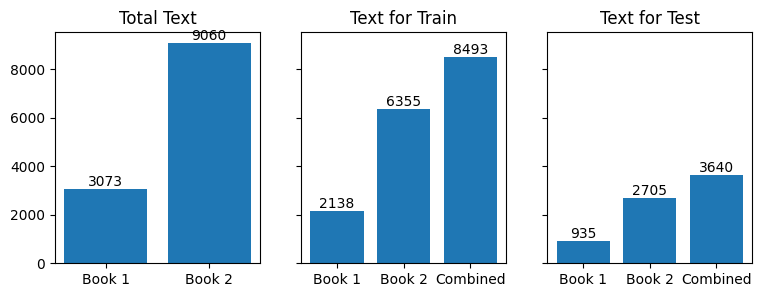

In [7]:
# create graphs
import matplotlib.pyplot as plt
# graph 1: overall size
data = {'Book 1': len(sentence[0]), 'Book 2': len(sentence[1])}
plot_y = list(data.values())
plot_x = list(data.keys())

# graph 2: count samples for training
df_train = pd.DataFrame(data={'X': x_train, 'Y': y_train})
df_train_count = df_train.pivot_table(columns=['Y'], aggfunc='size')

data2 = {'Book 1': df_train_count[0], 'Book 2': df_train_count[1], 'Combined': x_train.size}
plot_y2 = list(data2.values())
plot_x2 = list(data2.keys())

# graph 3: test
df_test = pd.DataFrame(data={'X': x_test, 'Y': y_test})
df_test_count = df_test.pivot_table(columns=['Y'], aggfunc='size')

data3 = {'Book 1': df_test_count[0], 'Book 2': df_test_count[1], 'Combined': x_test.size}
plot_y3 = list(data3.values())
plot_x3 = list(data3.keys())


# display graphs
fig, ax = plt.subplots(1, 3, figsize = (9, 3), sharey = True)
bar0 = ax[0].bar(plot_x, plot_y)
ax[0].bar_label(bar0)
bar1 = ax[1].bar(plot_x2, plot_y2)
ax[1].bar_label(bar1)
bar2 = ax[2].bar(plot_x3, plot_y3)
ax[2].bar_label(bar2)
ax[0].title.set_text("Total Text")
ax[1].title.set_text("Text for Train")
ax[2].title.set_text("Text for Test")


# Part 3: Preparing Vectors

vectorizes with term frequency-inverse document frequency (bag of words)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# stopwors code
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords as st
# vectorizer = CountVectorizer(stop_words = st.words('english'))

# can include stopwords
vectorizer = CountVectorizer(ngram_range = (1, 2))
# train on only test
x_vector_train = vectorizer.fit_transform(x_train)
# fit test
x_vector_test = vectorizer.transform(x_test)

# show first entry of train
print(x_train[0], "\n", x_vector_train[0])


0          EXTRACTS (Supplied by a Sub-Sub-Librarian).
0    You will rejoice to hear that no disaster has ...
Name: Sentence, dtype: object 
   (0, 52626)	2
  (0, 51985)	2
  (0, 97832)	2
  (0, 29325)	1
  (0, 103797)	1
  (0, 48992)	2
  (0, 119978)	1
  (0, 35874)	1
  (0, 59606)	1
  (0, 106390)	2
  (0, 58390)	1
  (0, 8894)	1
  (0, 48321)	1
  (0, 42871)	1
  (0, 40798)	1
  (0, 40003)	1
  (0, 85100)	1
  (0, 45127)	1
  (0, 63294)	3
  (0, 120636)	1
  (0, 86969)	1
  (0, 83308)	1
  (0, 52826)	2
  (0, 52452)	1
  (0, 98854)	1
  (0, 29327)	1
  (0, 103828)	1
  (0, 49725)	1
  (0, 101773)	1
  (0, 120004)	1
  (0, 36077)	1
  (0, 59776)	1
  (0, 107041)	1
  (0, 58398)	1
  (0, 9085)	1
  (0, 48359)	1
  (0, 43097)	1
  (0, 40956)	1
  (0, 40135)	1
  (0, 85110)	1
  (0, 49336)	1
  (0, 45270)	1
  (0, 63341)	1
  (0, 107632)	1
  (0, 120763)	1
  (0, 86979)	1
  (0, 63325)	1
  (0, 63318)	1
  (0, 52385)	1


vectorize lines into token sequences attempt 2

In [9]:
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# lower = set textx to lowercase
# filters are things to be filtered out of text
# default filters out punctuation.
keras_tokenizer = Tokenizer(lower=True)

# train tokenizer
keras_tokenizer.fit_on_texts(x_train)

# tokenize
x_train_token = keras_tokenizer.texts_to_sequences(x_train)
x_test_token = keras_tokenizer.texts_to_sequences(x_test)

# max length
max_length_sentence = 0
for sentence in x_train_token:
  if len(sentence) > max_length_sentence:
    max_length_sentence = len(sentence)

# pad vectors: puts 0's at the end
x_train_token_pad = pad_sequences(x_train_token, padding = "post")

# cut any vectors that are too long from testing; pad testing
x_test_token_pad = pad_sequences(x_test_token, 
                                truncating="post", 
                                maxlen = max_length_sentence, 
                                padding = "post")

# find largest value
largest_feature_value = 0
for sentence in x_train_token_pad:
  for word in sentence:
    if largest_feature_value < word:
      largest_feature_value = word


# Part 4: Sequential Models

## Ordinary NN


Build model

Hyperparameters: 
* features per layer [first number in the layers.Dense function]
* number of layers
* activation function


In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing, Input

max_features = max_length_sentence # get feature count from vectorizer
max_feature_value = largest_feature_value + 1

# sequential model = each layer has 1 input tensor and 1 output tensor
model_nn = models.Sequential() 
# give the model inputs
model_nn.add(Input(shape=(max_features,)))
# densely connected neural network layer
model_nn.add(layers.Dense(100, activation = 'sigmoid'))
# densely connected neural network layer
model_nn.add(layers.Dense(100, activation = 'relu'))
# densely connected neural network layer
model_nn.add(layers.Dense(100, activation = 'sigmoid'))
# densely connected neural network layer
model_nn.add(layers.Dense(1, activation = 'relu'))


# compile
model_nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# get summary
model_nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               23200     
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,501
Trainable params: 43,501
Non-trainable params: 0
_________________________________________________________________


Train model

In [31]:
# train
model_nn.fit(x_train_token_pad, y_train.to_numpy(), epochs=10, batch_size=128, validation_split = .2)

Epoch 1/10
54/54 [==============================] - 2s 9ms/step - loss: 0.6428 - accuracy: 0.7274 - val_loss: 0.5731 - val_accuracy: 0.7546
Epoch 2/10
54/54 [==============================] - 0s 6ms/step - loss: 0.5701 - accuracy: 0.7346 - val_loss: 0.6511 - val_accuracy: 0.7546
Epoch 3/10
54/54 [==============================] - 0s 6ms/step - loss: 0.5657 - accuracy: 0.7401 - val_loss: 0.9822 - val_accuracy: 0.7546
Epoch 4/10
54/54 [==============================] - 0s 7ms/step - loss: 0.5588 - accuracy: 0.7454 - val_loss: 0.7709 - val_accuracy: 0.7546
Epoch 5/10
54/54 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.7435 - val_loss: 0.5565 - val_accuracy: 0.7534
Epoch 6/10
54/54 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.7423 - val_loss: 0.5598 - val_accuracy: 0.7493
Epoch 7/10
54/54 [==============================] - 0s 6ms/step - loss: 0.5429 - accuracy: 0.7458 - val_loss: 0.9246 - val_accuracy: 0.7546
Epoch 8/10
54/54 [==

Test model

In [32]:
# consider results
from sklearn.metrics import classification_report
predictions = model_nn.predict(x_test_token_pad)

# set cutoff for measurement at 50% for continuous result to binary classification response
predictions = [1 if pred >= .5 else 0 for pred in predictions]
print(classification_report(y_test.to_numpy(), predictions))

114/114 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.00      0.01       935
           1       0.74      1.00      0.85      2705

    accuracy                           0.74      3640
   macro avg       0.71      0.50      0.43      3640
weighted avg       0.72      0.74      0.64      3640



## RNN

Build model

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

max_features = max_length_sentence # get feature count from vectorizer
max_feature_value = largest_feature_value + 1

# sequential model = each layer has 1 input tensor and 1 output tensor
model_rnn = models.Sequential() 
# embedding layer = turns simple input into vectors
model_rnn.add(layers.Embedding(max_feature_value, 3, input_length = max_length_sentence))
# simplernn = recurrent neural network: has memory/satate to learn sequence
# final state is formed from previous states
model_rnn.add(layers.SimpleRNN(32))
# densely connected neural network layer
model_rnn.add(layers.Dense(1, activation = 'sigmoid'))

# compile
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# get summary
model_rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 231, 3)            62637     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1152      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 63,822
Trainable params: 63,822
Non-trainable params: 0
_________________________________________________________________


Train model

In [34]:
# train
# class weight
class_0 = 0
class_1 = 0
for c in y_train:
  if c == 0:
    class_0 += 1
  if c == 1:
    class_1 += 1
weight = {0: class_0 / (class_0 + class_1), 1:class_1 / (class_0 + class_1)}

model_rnn.fit(x_train_token_pad, y_train.to_numpy(), epochs=10, batch_size=128, validation_split = .2, class_weight=weight)

Epoch 1/10
54/54 [==============================] - 6s 78ms/step - loss: 0.2810 - accuracy: 0.6922 - val_loss: 0.6744 - val_accuracy: 0.7546
Epoch 2/10
54/54 [==============================] - 4s 73ms/step - loss: 0.2061 - accuracy: 0.7467 - val_loss: 0.6106 - val_accuracy: 0.7546
Epoch 3/10
54/54 [==============================] - 5s 98ms/step - loss: 0.2061 - accuracy: 0.7467 - val_loss: 0.6335 - val_accuracy: 0.7546
Epoch 4/10
54/54 [==============================] - 4s 73ms/step - loss: 0.2059 - accuracy: 0.7467 - val_loss: 0.6515 - val_accuracy: 0.7546
Epoch 5/10
54/54 [==============================] - 4s 71ms/step - loss: 0.2059 - accuracy: 0.7467 - val_loss: 0.6736 - val_accuracy: 0.7546
Epoch 6/10
54/54 [==============================] - 5s 98ms/step - loss: 0.2061 - accuracy: 0.7467 - val_loss: 0.6086 - val_accuracy: 0.7546
Epoch 7/10
54/54 [==============================] - 4s 73ms/step - loss: 0.2062 - accuracy: 0.7467 - val_loss: 0.6033 - val_accuracy: 0.7546
Epoch 8/10
54

Test model

In [35]:
# consider results
from sklearn.metrics import classification_report
predictions = model_rnn.predict(x_test_token_pad)

# set cutoff for measurement at 50% for continuous result to binary classification response
predictions = [1 if pred >= .5 else 0 for pred in predictions]
print(classification_report(y_test.to_numpy(), predictions))

114/114 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       935
           1       0.74      1.00      0.85      2705

    accuracy                           0.74      3640
   macro avg       0.37      0.50      0.43      3640
weighted avg       0.55      0.74      0.63      3640



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN

Build Model

Hyperparameters:
* embedding size
* activation functions in convolutional layers
* shape of pooling

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

max_features = max_length_sentence # get feature count from vectorizer
max_feature_value = largest_feature_value + 1

model_cnn = models.Sequential() # 1 input and output per layer
model_cnn.add(layers.Embedding(max_feature_value, 50, input_length = max_length_sentence))
model_cnn.add(layers.Conv1D(32, 7, activation = 'relu')) # convolutional layer
model_cnn.add(layers.MaxPooling1D(5)) # reduce dimensionality
model_cnn.add(layers.Conv1D(32, 7, activation = "relu"))
model_cnn.add(layers.GlobalMaxPooling1D())  # pool together
model_cnn.add(layers.Dense(1)) # become 1 output

# compile
model_cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# get summary
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 231, 50)           1043950   
                                                                 
 conv1d (Conv1D)             (None, 225, 32)           11232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 45, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_33 (Dense)            (None, 1)                

Train model

In [37]:
# train
model_cnn.fit(x_train_token_pad, y_train.to_numpy(), epochs=10, batch_size=128, validation_split = .2)

Epoch 1/10
54/54 [==============================] - 9s 143ms/step - loss: 0.8262 - accuracy: 0.6754 - val_loss: 0.6082 - val_accuracy: 0.7540
Epoch 2/10
54/54 [==============================] - 9s 160ms/step - loss: 0.4763 - accuracy: 0.7776 - val_loss: 0.4744 - val_accuracy: 0.8405
Epoch 3/10
54/54 [==============================] - 7s 133ms/step - loss: 0.3011 - accuracy: 0.8996 - val_loss: 0.4409 - val_accuracy: 0.8846
Epoch 4/10
54/54 [==============================] - 14s 250ms/step - loss: 0.1856 - accuracy: 0.9438 - val_loss: 0.2810 - val_accuracy: 0.9058
Epoch 5/10
54/54 [==============================] - 9s 159ms/step - loss: 0.1324 - accuracy: 0.9661 - val_loss: 0.2866 - val_accuracy: 0.9176
Epoch 6/10
54/54 [==============================] - 8s 140ms/step - loss: 0.0938 - accuracy: 0.9795 - val_loss: 1.0997 - val_accuracy: 0.7616
Epoch 7/10
54/54 [==============================] - 8s 140ms/step - loss: 0.0824 - accuracy: 0.9837 - val_loss: 0.4818 - val_accuracy: 0.9217
Epoch

Test model

In [38]:
# consider results
from sklearn.metrics import classification_report
predictions = model_cnn.predict(x_test_token_pad)

# set cutoff for measurement at 50% for continuous result to binary classification response
predictions = [1 if pred >= .5 else 0 for pred in predictions]
print(classification_report(y_test.to_numpy(), predictions))

114/114 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       935
           1       0.95      0.96      0.96      2705

    accuracy                           0.93      3640
   macro avg       0.92      0.91      0.91      3640
weighted avg       0.93      0.93      0.93      3640



# Part 4: Models


## Naive Bayes

Train model

In [39]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(x_vector_train, y_train)

MultinomialNB()

Test and evaluate model

In [40]:
bayes_pred = bayes.predict(x_vector_test)

# print results
from sklearn.metrics import classification_report
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       935
           1       0.93      0.99      0.96      2705

    accuracy                           0.94      3640
   macro avg       0.95      0.88      0.91      3640
weighted avg       0.94      0.94      0.93      3640



## Logicstic Regression

Train model

In [41]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(solver='lbfgs')
regression.fit(x_vector_train, y_train)

LogisticRegression()

Test and evaluate model

In [42]:
regression_pred = regression.predict(x_vector_test)

# print results
from sklearn.metrics import classification_report
print(classification_report(y_test, regression_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       935
           1       0.93      0.98      0.95      2705

    accuracy                           0.93      3640
   macro avg       0.92      0.88      0.90      3640
weighted avg       0.93      0.93      0.92      3640



## Neural Network

Train model

In [43]:
from sklearn.neural_network import MLPClassifier
net = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=11)
net.fit(x_vector_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=11)

Test and evaluate model

In [44]:
net_pred = net.predict(x_vector_test)

# print results
from sklearn.metrics import classification_report
print(classification_report(y_test, net_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       935
           1       0.95      0.97      0.96      2705

    accuracy                           0.94      3640
   macro avg       0.92      0.91      0.91      3640
weighted avg       0.93      0.94      0.93      3640



# Part 5: Report

This experiment is a continuation of the previous text classification project; review the previous text classification project for the report of methods and traits of the sklearn models.

## Preprocessing
The model consists of a corpus of sentences from two books, with the goal of classifying a sentence as belonging to one book or the other. Legal text is removed from both raw text sources and the sources are tokenized.

The sentences are labeled as to which sentence they came from and then scrambled into a train-test assembly with 33% of the data going into the test set.

Both the train set and test sets are tokenized into lowercase words and transformed into a vector.
* The 'sentence' vector has an entry for each token in a sentence. Tokens are represented as numbers; only tokens in the training set are given a token id, and two tokens with the same token representation are represented by the same number.
* A 'sentence' vector is padded at the end with 0's to conform to the sentence length n, the size of the longest sentence in the training set. Testing sentences longer than n are cut at the nth character.
* Punctuation is not considered for tokenization and is discarded.

The naive bayes, sklearn implementation of a nerual network, and logistic regression functions all work off a bag of words approach.

## Sequential Networks
Sequential networks are neural networks that are composed of several layers, where each layer's output feeds the subsequent layer's input.

Of the approaches tested, both the ordinary nerual network and the RNN network are very ill-suited to the task of classification when the input is a vector of tokens; they would probably perform better on something like a bag of words representation.

CNN, however, was well suited to the task of clssification on an ordered vector of tokens.

Compared to the typical size of datasets used for training deep learning networks, this dataset is very small which presents yet another reason that the NN and RNN networks performed very poorly.

None of the deep learning tasks outperformed simpler sklearn functions operated on bag of words representations as opposed to a vector of tokens, though CNN yielded performance that was comparable.

### NN
An ordinary neural network learns a pattern from adjusting weights so the answer it predicts for an example more closely matches the actual example class.

* Variations can be made by using more or fewer layers, changing the number of nodes in a layer, changing the activation function, and using techniques like early cutoff training.
* In experiments run for this project, 'sigmoid' activation performed better than 'relu' (higher weighted accuracy and F1-score) for densely connected layers of 100 nodes.
* Using a deeper network (more layers) improved performance over only 1 layer of internal nodes.
* Increasing the number of nodes only sometimes improved performance, with both 1000 and 500 nodes in each layer negatively impacting performance over 100 nodes.
* A poor selection of layer node numbers can easily classify all examples as one classification or the other with binary classification, resulting in very poor accuracy results.

### CNN
A convolutional neural network learns patterns in data from small windows called filters. This type of neural network is better for recognizing relationships between features with some independence of the precise positioning of the features in the input sequence. These networks work very well for image data since images are collections of patterns whose meaning is independent of their spatial location in a matrix. For this reason, they may also be good at detecting grammatical devices if the sentence style differs significantly between the two different books being classified.
* 1D convolutional layers are used since they best represent sequential data. (2D would be useful for images, and 3D for volume spaces)
* On this data, there is only a marginal difference between an embedding size of 10 and 128, but a size of 1000 is wildly inefficient, failing to classify one type of document entirelly. 50 ended up having greater accuracy than the 10 and 128. Since a number of elements more reasonable to the size of a sentence seemed to improve performance, the size of 20 was tested; this one had radically poor performance due to misclassifying an entire category. A probable cause for this is that the models were trained to value accuracy instead of a more wholistic metric like F-1 score.
* The CNN models significantly outperformed the tensorflow NN model.


### RNN
A recurrent neural network uses a state to learn a sequence. This model encodes data of patterns in features it has observed while examining an example of data.* Several variations exist to address problems like the vanishing gradient problem; the nuances of these models is not explored in this report.
* I could not find an arrangement of values where the RNN did not completely misclassify one of the classes. No embedding size fixed the issue, and changing the weights of the classes to more evenly distribute training examples also did not change the results.
* RNN models appear to be very poorly suited for this task with the current feature tokenization.